<a href="https://colab.research.google.com/github/data-with-shobhit/Customer-Purchase-Behavior-Analysis-using-Descriptive-Statistics/blob/main/Applied_Statistics_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Purchase Behavior Analysis using Descriptive Statistics

##Problem Statement

🔍 **Problem Statement**:

Welcome to the Probability and Statistics project! 📊🔍 In this exciting journey, you'll get the chance to apply the concepts you've learned in probability theory and statistics to analyze a real-world dataset. This project is your opportunity to dive deep into the world of data analysis and gain practical experience with the tools and techniques you've been learning. 🚀

🎯 **Objective**:

Your mission is to analyze the provided dataset containing customer information and purchasing behavior to make informed decisions. Your goal is to identify patterns, trends, and correlations that will help your company optimize its marketing efforts and increase offer acceptance rates. 🎉

##About the Dataset



Here's the link to the [dataset](https://docs.google.com/spreadsheets/d/12ln9iTNcVNOMYi_AU-OczKpa_KIP8XyVbsjk81Na8Yk/edit?usp=sharing)


This data was gathered during last year's campaign.
Data description is as follows;

1. Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
1. ID - Unique ID of each customer
1. Year_Birth - Age of the customer
1. Complain - 1 if the customer complained in the last 2 years
1. Dt_Customer - date of customer's enrollment with the company
1. Education - customer's level of education
1. Marital - customer's marital status
1. Kidhome - number of small children in customer's household
1. Teenhome - number of teenagers in customer's household
1. Income - customer's yearly household income
1. MntFishProducts - the amount spent on fish products in the last 2 years
1. MntMeatProducts - the amount spent on meat products in the last 2 years
1. MntFruits - the amount spent on fruits products in the last 2 years
1. MntSweetProducts - amount spent on sweet products in the last 2 years
1. MntWines - the amount spent on wine products in the last 2 years
1. MntGoldProds - the amount spent on gold products in the last 2 years
1. NumDealsPurchases - number of purchases made with discount
1. NumCatalogPurchases - number of purchases made using catalog (buying goods to be shipped through the mail)
1. NumStorePurchases - number of purchases made directly in stores
1. NumWebPurchases - number of purchases made through the company's website
1. NumWebVisitsMonth - number of visits to company's website in the last month
1. Recency - number of days since the last purchase





##Task 1 - Basic CleanUp

- **Clean and preprocess the dataset (handling missing values, data types, etc.).**

- **Analyze the distribution of customer demographics (age, education, marital status) using descriptive statistics and visualizations.**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df= pd.read_csv('/content/drive/MyDrive/Superstore Marketing Data - Sheet1.csv')

In [ ]:
df.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,########,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,########,0,6,...,11,0,34,2,3,1,2,7,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
df.columns

Index(['Id', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Complain'],
      dtype='object')

In [ ]:
# Rows and Columns
df.shape

(2240, 22)

In [ ]:
df['Dt_Customer']=pd.to_datetime(df['Dt_Customer'],errors='coerce')

In [ ]:
df.isnull().sum()

,0
Id,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,916
Recency,0
MntWines,0


In [ ]:
# Percentage of Null Values
null_percentage= (df.isnull().sum()/len(df))*100
null_percentage

,0
Id,0.000000
Year_Birth,0.000000
Education,0.000000
Marital_Status,0.000000
Income,1.071429
Kidhome,0.000000
Teenhome,0.000000
Dt_Customer,40.892857
Recency,0.000000
MntWines,0.000000


In [ ]:
df.drop(columns='Dt_Customer', inplace=True)

In [ ]:
median_income = df['Income'].median()
df['Income'].fillna(median_income, inplace=True)

In [ ]:
df.describe()

,Id,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52237.975446,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.149107,0.009375
std,3246.662198,11.984069,25037.955891,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.356274,0.096391
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000


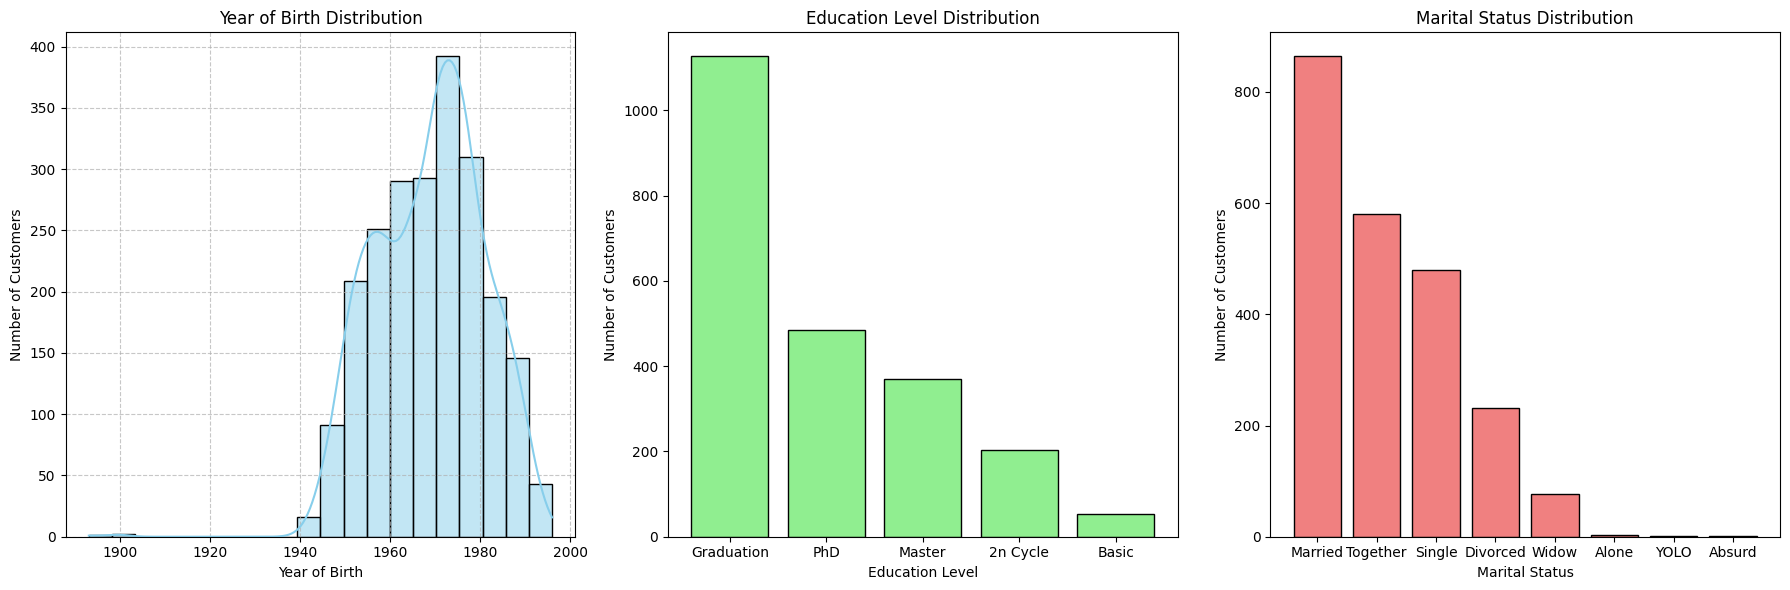

In [ ]:
# Create a figure with 3 subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# 1. Year_Birth Distribution (Histogram)
sns.histplot(df['Year_Birth'], bins=20, kde=True, color='skyblue', edgecolor='black', ax=axs[0])
axs[0].set_title('Year of Birth Distribution')
axs[0].set_xlabel('Year of Birth')
axs[0].set_ylabel('Number of Customers')
axs[0].grid(True, linestyle='--', alpha=0.7)

# 2. Education Level (Bar Chart)
education_counts = df['Education'].value_counts()
axs[1].bar(education_counts.index, education_counts.values, color='lightgreen', edgecolor='black')
axs[1].set_title('Education Level Distribution')
axs[1].set_xlabel('Education Level')
axs[1].set_ylabel('Number of Customers')

# 3. Marital Status (Bar Chart)
marital_counts = df['Marital_Status'].value_counts()
axs[2].bar(marital_counts.index, marital_counts.values, color='lightcoral', edgecolor='black')
axs[2].set_title('Marital Status Distribution')
axs[2].set_xlabel('Marital Status')
axs[2].set_ylabel('Number of Customers')


# Adjust layout
plt.tight_layout()
plt.show()



**Deliverables**:

- **Cleaned and Preprocessed Dataset**:

  Provide a detailed report on the steps taken to handle missing values, including imputation methods used if applicable.
  Document the process of ensuring consistent data types for each variable, addressing any inconsistencies.

- **Summary of Basic Statistics**:

  Present calculated statistics such as mean, median, variance, and standard deviation for each relevant numerical variable.
  Include a concise table or summary showcasing these measures for easy reference.

##Task 2 - Descriptive Statistics 📊

- **Calculate measures of central tendency (mean, median, mode) and measures of dispersion (variance, standard deviation) for key variables. Identify and handle outliers if necessary.**


In [ ]:
df_cleaned= df.copy() # new copy

In [ ]:
# Function For Central tendency and Dispersion (Mean,Median,Mode,variance,standard deviation)
def ctanddis(data, var_list):
    # Create an empty list to collect results
    results = []

    for var in var_list:
        mean = data[var].mean()
        median = data[var].median()
        mode = data[var].mode().iloc[0]  # mode() returns a Series; take the first value
        variance = data[var].var()
        std_dev = data[var].std()

        # Append results as a dictionary to the list
        results.append({
            'Variable': var,
        'Mean': f"{mean:.2f}",
        'Median': f"{median:.2f}",
        'Mode': f"{mode:.2f}",
        'Variance': f"{variance:.2f}",
        'Std Dev': f"{std_dev:.2f}"
        })

    # Convert the list of dictionaries to a DataFrame
    results_data = pd.DataFrame(results)

    return results_data

In [ ]:
var_list = ['Income', 'MntWines', 'MntFruits', 'MntMeatProducts',
             'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
             'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases'
             ]

In [ ]:
summary_stats = ctanddis(df_cleaned, var_list)
print(summary_stats)

              Variable      Mean    Median      Mode      Variance   Std Dev
0               Income  52237.98  51381.50  51381.50  626899235.18  25037.96
1             MntWines    303.94    173.50      2.00     113297.80    336.60
2            MntFruits     26.30      8.00      0.00       1581.93     39.77
3      MntMeatProducts    166.95     67.00      7.00      50947.43    225.72
4      MntFishProducts     37.53     12.00      0.00       2984.33     54.63
5     MntSweetProducts     27.06      8.00      0.00       1704.08     41.28
6         MntGoldProds     44.02     24.00      1.00       2721.44     52.17
7    NumDealsPurchases      2.33      2.00      1.00          3.73      1.93
8      NumWebPurchases      4.08      4.00      2.00          7.72      2.78
9  NumCatalogPurchases      2.66      2.00      0.00          8.54      2.92


In [ ]:
# Identify all numerical columns in the dataset
numerical_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Remove outliers for all numerical columns using IQR
for col in numerical_cols:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]



In [ ]:
df_cleaned.shape

(885, 21)

In [ ]:
numerical_cols = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
                  'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
                  'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
                  'NumWebVisitsMonth','Response','Complain']

In [ ]:
summary_stats = ctanddis(df_cleaned,numerical_cols)
print(summary_stats)

               Variable      Mean    Median      Mode      Variance   Std Dev
0            Year_Birth   1970.97   1972.00   1976.00        122.41     11.06
1                Income  35149.41  34633.00  51381.50  149643933.00  12232.90
2               Kidhome      0.78      1.00      1.00          0.25      0.50
3              Teenhome      0.50      0.00      0.00          0.28      0.53
4               Recency     51.36     51.00     49.00        820.63     28.65
5              MntWines     42.33     21.00      2.00       3339.01     57.78
6             MntFruits      4.22      2.00      0.00         37.82      6.15
7       MntMeatProducts     20.91     13.00      7.00        524.44     22.90
8       MntFishProducts      5.96      3.00      0.00         56.27      7.50
9      MntSweetProducts      3.93      2.00      0.00         24.59      4.96
10         MntGoldProds     12.62      9.00      1.00        154.57     12.43
11    NumDealsPurchases      1.98      2.00      1.00          1

**Deliverables**:

- **Descriptive statistics that reveal the central tendencies, variations, and potential outliers in the dataset.**:

  

## Task 3 - Probability Distributions 🎲

- **Identify variables that could follow specific probability distributions (e.g., Binomial, Normal). Calculate probabilities and expected values based on these distributions.**



Normal distribution

In [ ]:
import scipy.stats as stats

# Calculate mean and standard deviation of Income
mean_income = df_cleaned['Income'].mean()
std_income = df_cleaned['Income'].std()

# Probability of income being between 50000 and 60000
prob =stats.norm.cdf(60000, mean_income, std_income) -stats.norm.cdf(50000, mean_income, std_income)
print(f"Probability of income between 50000 and 60000: {prob:.4f}")

Probability of income between 50000 and 60000: 0.0913


 Poisson distribution

In [ ]:
from scipy.stats import poisson

# Probability of spending exactly 5 on fruits
prob = poisson.pmf(5, df_cleaned['MntFruits'].mean())
print(f"Probability of spending exactly 5 on fruits: {prob:.4f}")


Probability of spending exactly 5 on fruits: 0.1640


In [ ]:
# List of count/frequency variables
count_columns = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'NumDealsPurchases']

for column in count_columns:
    # Extracting data for the column (replace 'df' with your DataFrame)
    data = df_cleaned[column].dropna()  # Remove missing values if any

    # Fit a Poisson distribution using maximum likelihood estimation (MLE)
    mu = data.mean()  # Using sample mean as parameter for Poisson
    fitted_poisson = stats.poisson(mu)

    # Calculate probabilities and expected value
    prob_5 = fitted_poisson.pmf(5)  # Probability of value = 5
    expected_value = fitted_poisson.mean()  # Expected value (mean)

    # Display results for each column
    print(f"Variable: {column}")
    print(f"Estimated Mean (mu) for Poisson: {mu:.2f}")
    print(f"Probability of value = 5: {prob_5:.4f}")
    print(f"Expected Value (mean): {expected_value:.2f}\n")

Variable: NumWebPurchases
Estimated Mean (mu) for Poisson: 2.10
Probability of value = 5: 0.0418
Expected Value (mean): 2.10

Variable: NumCatalogPurchases
Estimated Mean (mu) for Poisson: 0.46
Probability of value = 5: 0.0001
Expected Value (mean): 0.46

Variable: NumStorePurchases
Estimated Mean (mu) for Poisson: 3.21
Probability of value = 5: 0.1145
Expected Value (mean): 3.21

Variable: NumWebVisitsMonth
Estimated Mean (mu) for Poisson: 6.35
Probability of value = 5: 0.1503
Expected Value (mean): 6.35

Variable: NumDealsPurchases
Estimated Mean (mu) for Poisson: 1.98
Probability of value = 5: 0.0350
Expected Value (mean): 1.98



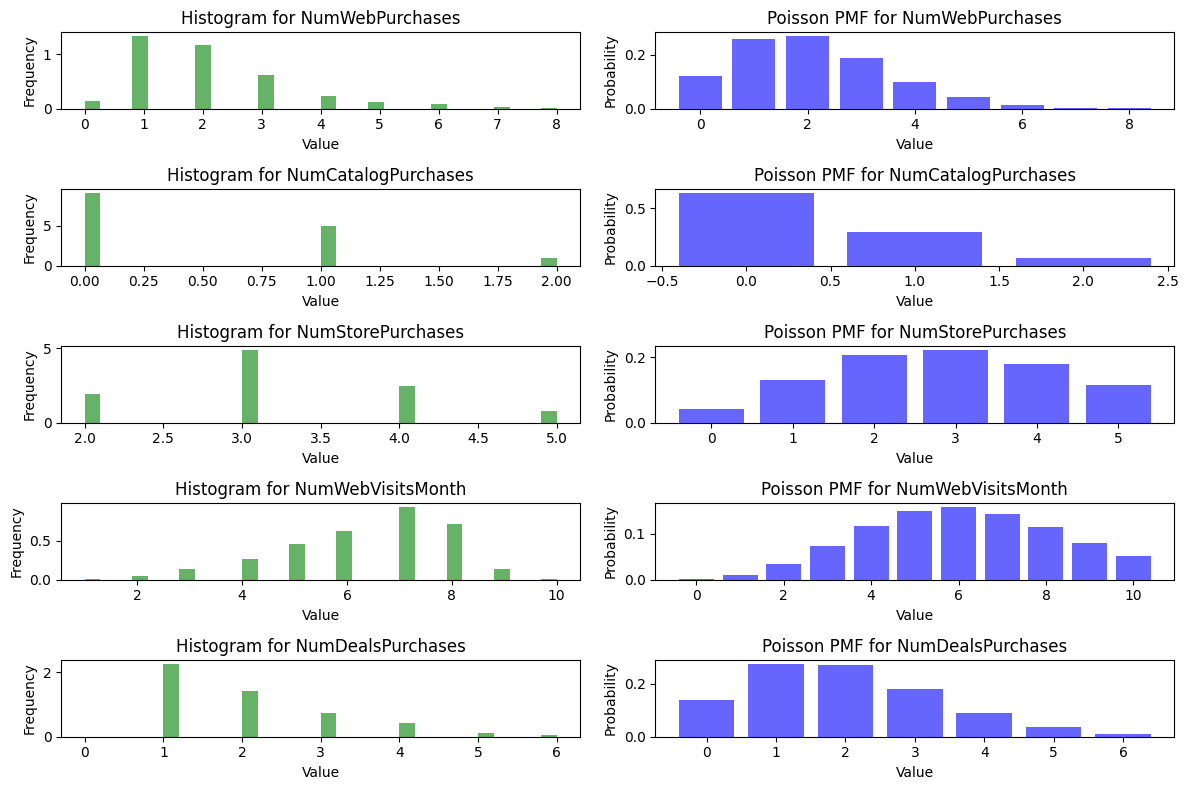

In [ ]:
fig, axes = plt.subplots(nrows=len(count_columns), ncols=2, figsize=(12, 8))

for i, column in enumerate(count_columns):
    # Extracting data for the column (replace 'df' with your DataFrame)
    data = df_cleaned[column].dropna()  # Remove missing values if any

    # Fit a Poisson distribution using maximum likelihood estimation (MLE)
    mu = data.mean()  # Using sample mean as parameter for Poisson
    fitted_poisson = stats.poisson(mu)

    # Create histogram
    axes[i, 0].hist(data, bins=30, density=True, alpha=0.6, color='green')
    axes[i, 0].set_title(f'Histogram for {column}')
    axes[i, 0].set_xlabel('Value')
    axes[i, 0].set_ylabel('Frequency')

    # Plot the probability mass function (PMF) of the fitted Poisson distribution
    x = range(0, int(max(data)) + 1)  # Ensure maximum value is converted to an integer
    pmf_values = fitted_poisson.pmf(x)
    axes[i, 1].bar(x, pmf_values, alpha=0.6, color='blue')
    axes[i, 1].set_title(f'Poisson PMF for {column}')
    axes[i, 1].set_xlabel('Value')
    axes[i, 1].set_ylabel('Probability')

plt.tight_layout()
plt.show()

In [ ]:
# List of continuous variables
continuous_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

for column in continuous_columns:
    # Extracting data for the column (replace 'df' with your DataFrame)
    data = df_cleaned[column].dropna()  # Remove missing values if any

    # Fit a Normal distribution using maximum likelihood estimation (MLE)
    mu, sigma = stats.norm.fit(data)

    # Calculate probabilities and expected value
    prob_100 = stats.norm.cdf(100, mu, sigma)  # Probability of value <= 100
    expected_value = stats.norm.mean(mu, sigma)  # Expected value (mean)

    # Display results for each column
    print(f"Variable: {column}")
    print(f"Estimated Mean (mu): {mu:.2f}")
    print(f"Estimated Standard Deviation (sigma): {sigma:.2f}")
    print(f"Probability of value <= 100: {prob_100:.4f}")
    print(f"Expected Value (mean): {expected_value:.2f}\n")

Variable: MntWines
Estimated Mean (mu): 42.33
Estimated Standard Deviation (sigma): 57.75
Probability of value <= 100: 0.8410
Expected Value (mean): 42.33

Variable: MntFruits
Estimated Mean (mu): 4.22
Estimated Standard Deviation (sigma): 6.15
Probability of value <= 100: 1.0000
Expected Value (mean): 4.22

Variable: MntMeatProducts
Estimated Mean (mu): 20.91
Estimated Standard Deviation (sigma): 22.89
Probability of value <= 100: 0.9997
Expected Value (mean): 20.91

Variable: MntFishProducts
Estimated Mean (mu): 5.96
Estimated Standard Deviation (sigma): 7.50
Probability of value <= 100: 1.0000
Expected Value (mean): 5.96

Variable: MntSweetProducts
Estimated Mean (mu): 3.93
Estimated Standard Deviation (sigma): 4.96
Probability of value <= 100: 1.0000
Expected Value (mean): 3.93

Variable: MntGoldProds
Estimated Mean (mu): 12.62
Estimated Standard Deviation (sigma): 12.43
Probability of value <= 100: 1.0000
Expected Value (mean): 12.62



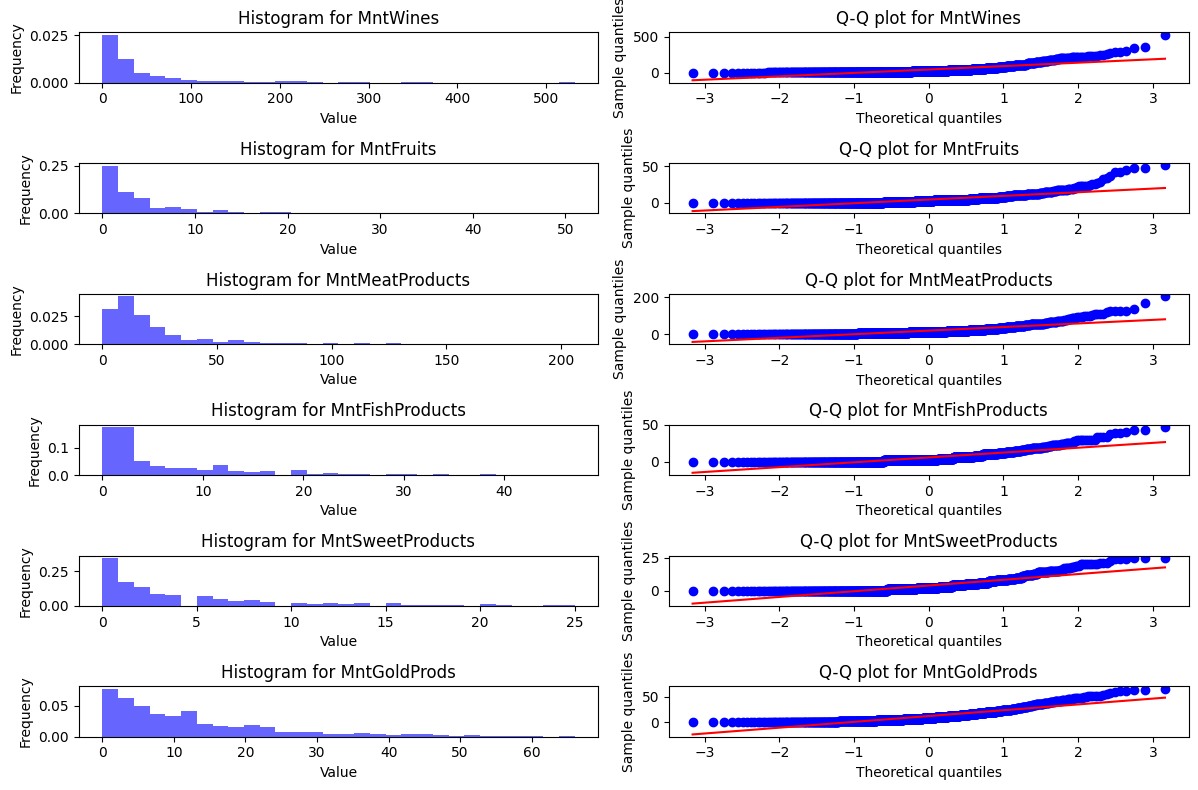

In [ ]:
fig, axes = plt.subplots(nrows=len(continuous_columns), ncols=2, figsize=(12, 8))

for i, column in enumerate(continuous_columns):
    # Extracting data for the column (replace 'df' with your DataFrame)
    data = df_cleaned[column].dropna()  # Remove missing values if any

    # Fit a Normal distribution using maximum likelihood estimation (MLE)
    mu, sigma = stats.norm.fit(data)

    # Create histogram
    axes[i, 0].hist(data, bins=30, density=True, alpha=0.6, color='blue')
    axes[i, 0].set_title(f'Histogram for {column}')
    axes[i, 0].set_xlabel('Value')
    axes[i, 0].set_ylabel('Frequency')

    # Create Q-Q plot (quantile-quantile plot)
    stats.probplot(data, dist="norm", plot=axes[i, 1])
    axes[i, 1].get_lines()[1].set_color('red')  # Highlight the Normal distribution line
    axes[i, 1].set_title(f'Q-Q plot for {column}')
    axes[i, 1].set_xlabel('Theoretical quantiles')
    axes[i, 1].set_ylabel('Sample quantiles')

plt.tight_layout()
plt.show()

**Deliverables**:

- **Determination of suitable probability distributions for relevant variables and corresponding calculated probabilities and expected values.**:

  

## Task 4: Insights and Customer Segmentation 📈

- **Explore relationships between customer characteristics and spending habits. Segment customers based on their behaviors and characteristics.**

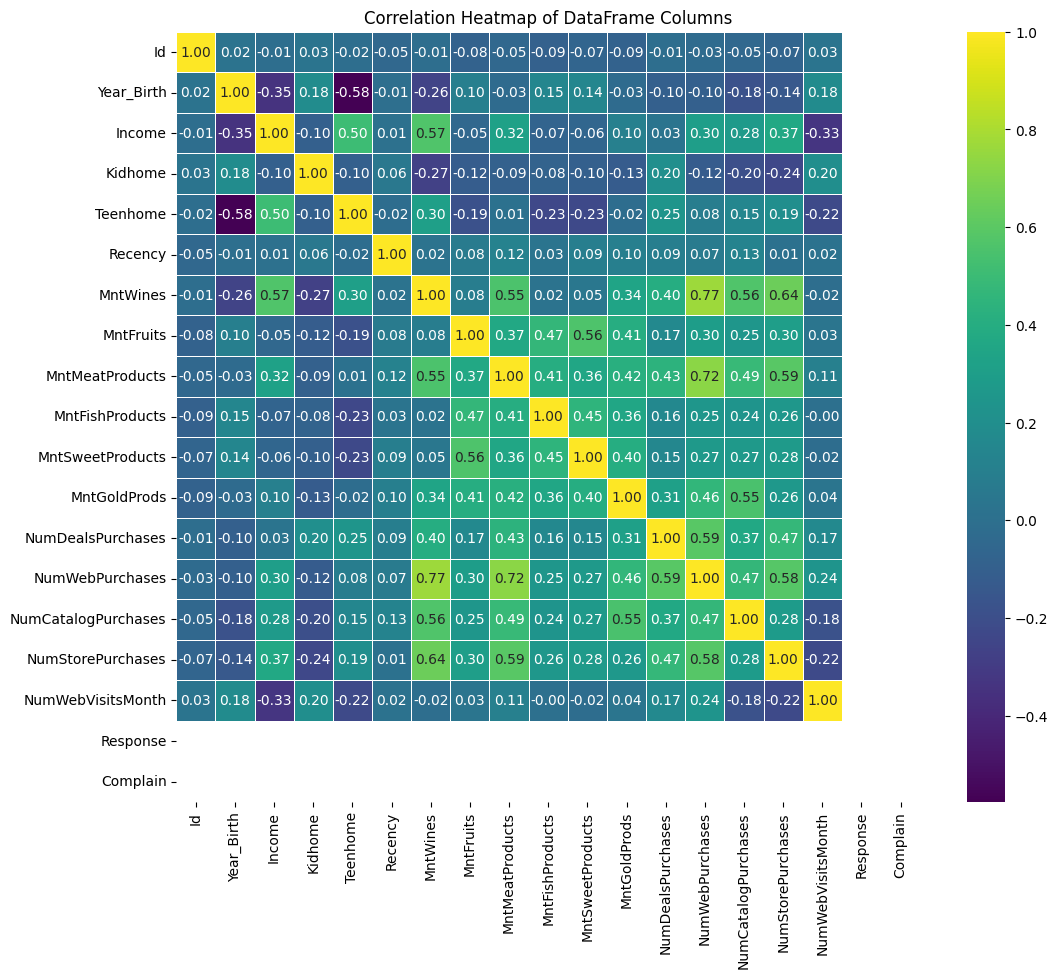

In [ ]:
corr_matrix = df_cleaned.corr(numeric_only=True)

# Plotting the heatmap
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of DataFrame Columns')
plt.show()

**Key Insights**

**Spending Habits and Demographics:**

* **Income and Spending:** There's a strong positive correlation between income and spending across various product categories (wines, meat, gold products). Higher-income customers tend to spend more.
* **Age and Wine:** A moderate positive correlation exists between age (Year_Birth) and wine spending, suggesting older customers might be more inclined towards wine purchases.
* **Education and Gold:** A weak positive correlation is observed between education level and spending on gold products.  
* **Family and Purchases:** Customers with kids (Kidhome, Teenhome) show a slight negative correlation with certain product purchases (wines, gold), possibly due to budget allocation towards family needs.

**Customer Segmentation:**

* **High-Value Customers:** Segment customers based on high total spending across categories. These customers are likely your most valuable and could be targeted with premium offers and loyalty programs.
* **Wine Enthusiasts:**  Identify customers with high spending on wines. Target them with exclusive wine deals, tastings, or information about new arrivals.
* **Health-Conscious Shoppers:** Segment customers who spend more on fruits and fish products. Tailor promotions for healthy and organic products towards this group.
* **Deal Seekers:** Customers with a high number of 'NumDealsPurchases' are likely attracted to discounts and offers. Focus on promotional campaigns and coupons for this segment.
* **Online Shoppers:**  Customers with high 'NumWebPurchases' and 'NumWebVisitsMonth' prefer online shopping. Personalize online experiences, recommend products based on browsing history, and offer online-exclusive deals.

**Distinct Customer Segments Based on Behaviors:**

1. **Affluent Connoisseurs:** High income, high spending on wines, meat, and gold products.
2. **Young Families:** Presence of kids, moderate income, focus on essential groceries and deals.
3. **Health-Conscious Individuals:** Higher spending on fruits and fish, possibly with higher education levels.
4. **Tech-Savvy Shoppers:** Frequent online purchases and website visits, responsive to online marketing.
5. **Bargain Hunters:** Driven by deals and discounts, likely to respond to promotional campaigns.

**Deliverables**:

- **Key insights regarding relationships between variables and distinct customer segments based on behaviors.**

  

## Task 5: Conclusion and Recommendations

- **Create clear visualizations to showcase your findings. Use insights to make recommendations for the company based on your analysis.**

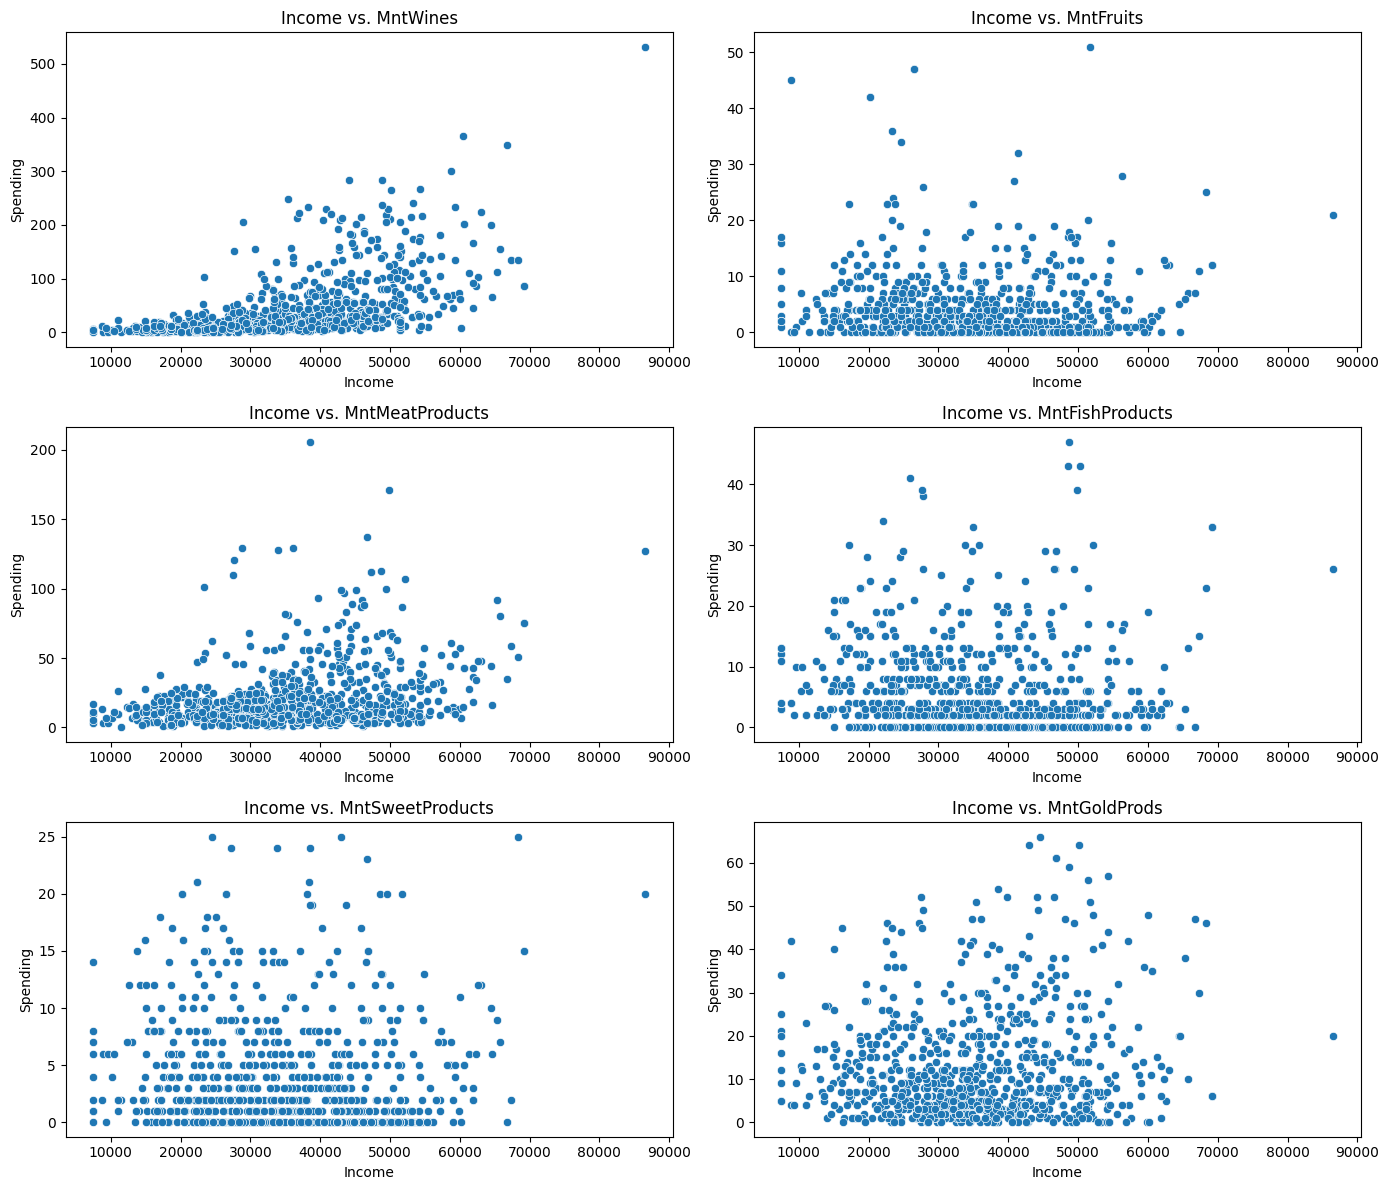

In [ ]:
# Scatter Plots: Income vs. Spending on All Product Categories
# List of product categories for spending
product_categories = ['MntWines', 'MntFruits', 'MntMeatProducts',
                      'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Set up the matplotlib figure with 3x2 plots (6 total)
fig, axes = plt.subplots(3, 2, figsize=(14, 12))

# Iterate over each product category and plot
for i, product in enumerate(product_categories):
    row, col = divmod(i, 2)
    sns.scatterplot(x='Income', y=product, data=df_cleaned, ax=axes[row, col])
    axes[row, col].set_title(f'Income vs. {product}')
    axes[row, col].set_xlabel('Income')
    axes[row, col].set_ylabel('Spending')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

Insights from Scatter Plots: Income vs. Spending on All Product Categories:

* Positive Correlation: There's a clear positive correlation between income and spending
* on most product categories, especially wines, meat, and gold products. Higher-income
* customers tend to spend more in these categories.

Varying Strengths:
* The strength of the correlation varies between categories.
The relationship is strongest for wines, meat, and gold, and less pronounced for fruits, sweet products, and fish.

* Potential Outliers: There are some potential outliers, particularly in the higher
* income ranges, indicating some customers with exceptionally high spending habits.

Segmentation Opportunity:
* The varying spending patterns suggest opportunities for customer segmentation based on income and product preferences.


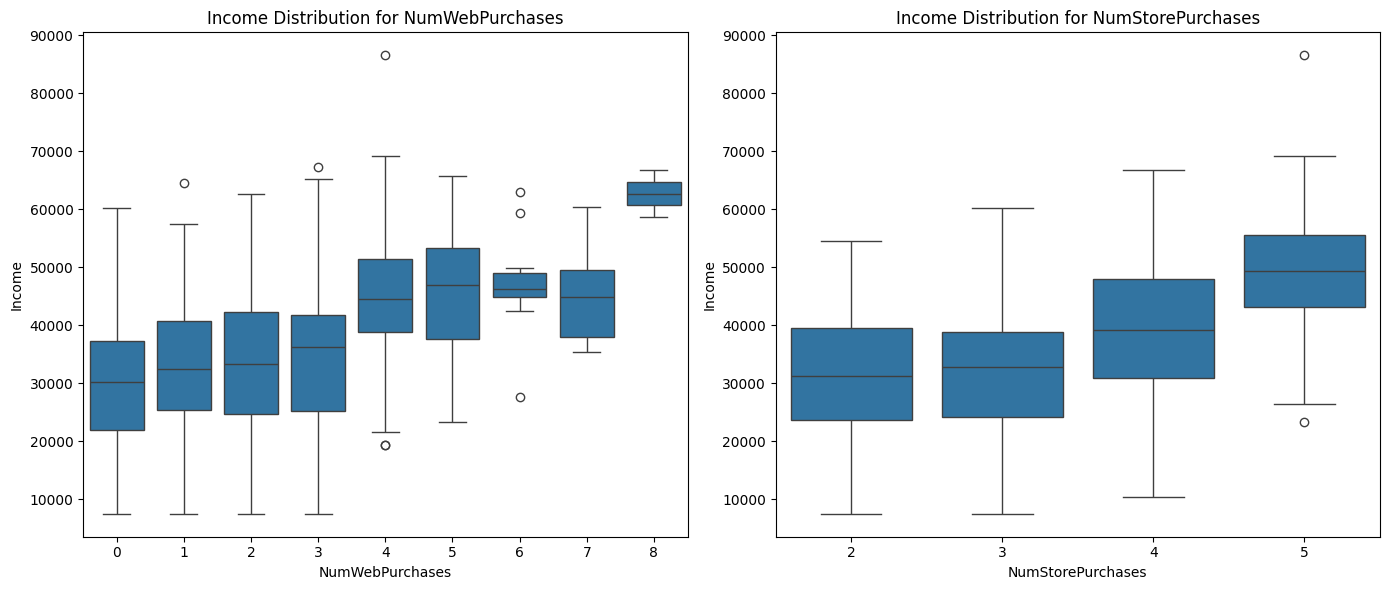

In [ ]:
# Income Distribution for NumWebPurchases and NumstorePurchases
plt.figure(figsize=(14, 6))

# Box plot for NumWebPurchases with respect to Income
plt.subplot(1, 2, 1)
sns.boxplot(x='NumWebPurchases', y='Income', data=df_cleaned)
plt.title('Income Distribution for NumWebPurchases')

# Box plot for NumStorePurchases with respect to Income
plt.subplot(1, 2, 2)
sns.boxplot(x='NumStorePurchases', y='Income', data=df_cleaned)
plt.title('Income Distribution for NumStorePurchases')

plt.tight_layout()
plt.show()



Insights from Income Distribution for NumWebPurchases and NumstorePurchases:

NumWebPurchases and Income:
- Higher Income, More Online Purchases: Customers with higher incomes tend to make more online purchases. The median income for those with a higher number of web purchases is noticeably higher.
- Potential for Targeted Online Marketing: This suggests that online marketing and promotions could be particularly effective for higher-income customer segments.

NumStorePurchases and Income:
- Less Clear Relationship: The relationship between income and in-store purchases is less clear-cut. The median income doesn't show a strong trend across different levels of store purchases.
- Diverse Customer Base for In-Store: This might indicate a more diverse income range for customers who prefer in-store shopping.


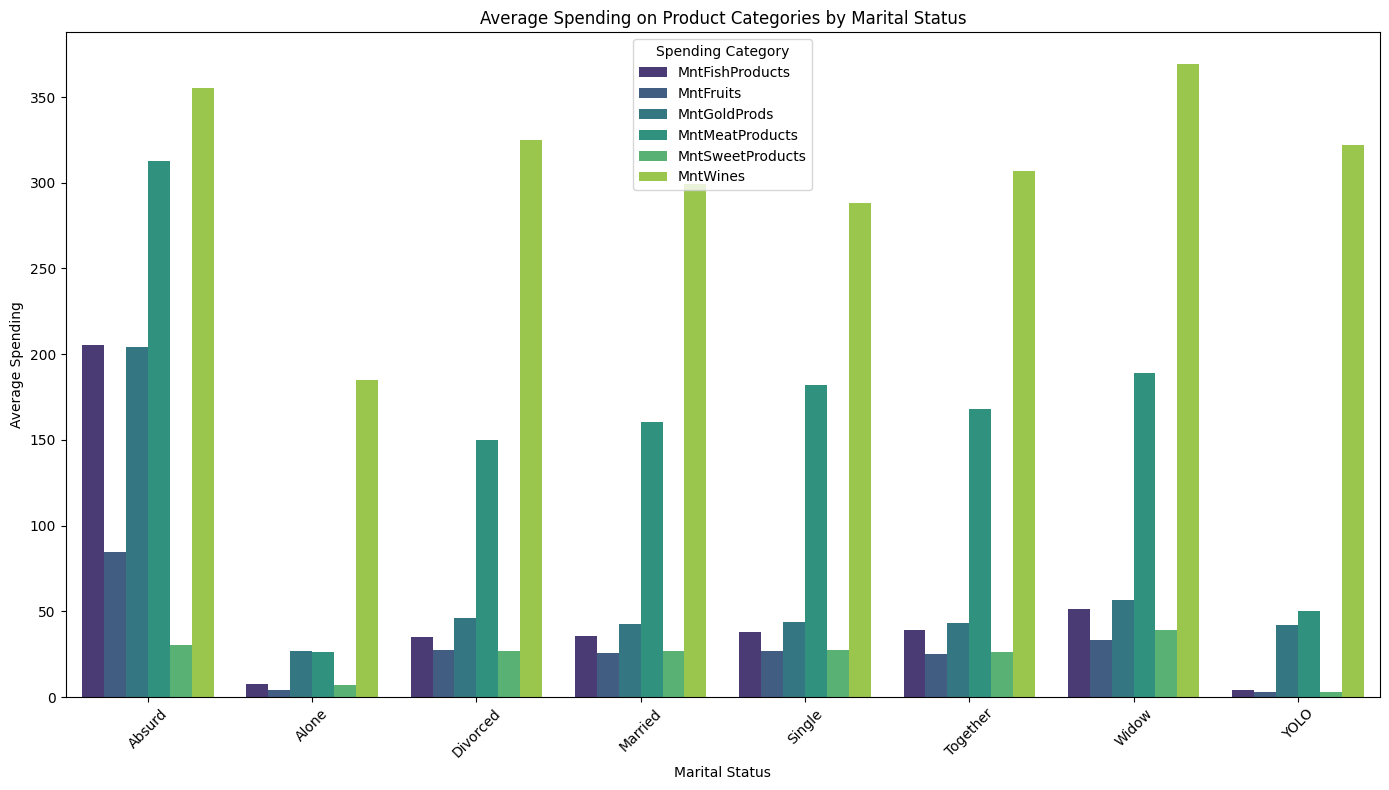

In [ ]:
#Average Spending on Product Categories by Marital Status
# List of spending columns
spending_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                    'MntSweetProducts', 'MntGoldProds']

# Melt the dataframe to long format for easier plotting
melted_df = df.melt(id_vars='Marital_Status', value_vars=spending_columns,
                    var_name='Spending_Category', value_name='Spending')

# Calculate average spending by marital status and spending category
avg_spending_by_marital_status = melted_df.groupby(['Marital_Status', 'Spending_Category']).mean().reset_index()

# Plotting
plt.figure(figsize=(14, 8))
sns.barplot(x='Marital_Status', y='Spending', hue='Spending_Category', data=avg_spending_by_marital_status, palette='viridis')

plt.title('Average Spending on Product Categories by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Average Spending')
plt.xticks(rotation=45)  # Rotating x-axis labels for better readability
plt.legend(title='Spending Category')
plt.tight_layout()
plt.show()

Insights from Average Spending on Product Categories by Marital Status:

Spending Patterns by Marital Status:
- Married Couples: Married individuals tend to have the highest average spending on wines, meat products, and gold products.
- Single Individuals: Single individuals show a higher average spending on fruits and sweet products compared to other marital status categories.
- Widowed: Widowed individuals exhibit lower average spending across most categories, particularly in wines, meat, and gold.
- Divorced: Divorced individuals generally fall in between other categories in terms of spending.

Marketing Implications:
- Targeted Promotions: These insights can be used to tailor marketing campaigns based on marital status. For instance, promotions for premium wines and meat could be targeted towards married couples, while offers for fruits and sweets could be directed towards single individuals.
- Product Bundling: Consider creating product bundles that cater to the preferences of different marital status groups, such as wine and meat packages for married couples or fruit and dessert baskets for single individuals.


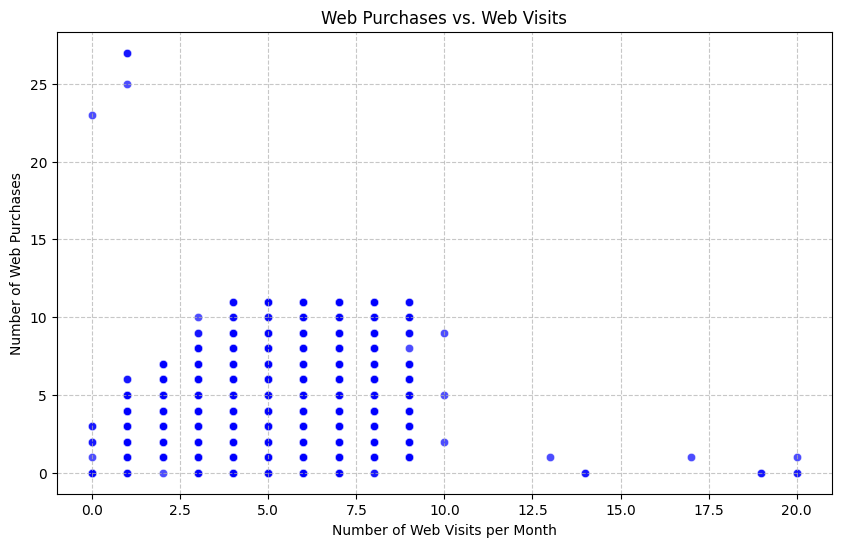

In [ ]:
# Web Purchases vs. Web Visits
# Create scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='NumWebVisitsMonth', y='NumWebPurchases', data=df, color='blue', alpha=0.7)

plt.title('Web Purchases vs. Web Visits')
plt.xlabel('Number of Web Visits per Month')
plt.ylabel('Number of Web Purchases')
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()


Insights from Web Purchases vs. Web Visits:

- Positive Correlation: There's a general positive correlation between the number of web visits per month and the number of web purchases. Customers who visit the website more frequently tend to make more purchases online.

- Not Strictly Linear: The relationship is not strictly linear. There's a cluster of customers with high web visits but relatively low purchases, indicating potential for improvement in conversion rates for these frequent visitors.

- Segmentation Opportunity: The plot suggests opportunities for segmentation based on online engagement. High-visit, high-purchase customers could be targeted with personalized recommendations and loyalty programs. High-visit, low-purchase customers might benefit from targeted promotions or improved website usability to encourage conversions.


**Deliverables**:

- **Well-designed visualizations that visually represent your insights and actionable recommendations based on customer behavior analysis.**

## Bonus Task - Geogebra Experiment



Here's the link to an intriguing GeoGebra experiment: [GeoGebra Experiment Link](https://www.geogebra.org/m/LZbwMZtJ)

This experiment lets you simulate coin flips as per your preferences and specifications!

Your task involves recording a video where you'll explain the concept of the **Law of Large Numbers** using this experiment. Dive further into the experience by adjusting the number of coins and exploring varying coin biases. 🪙📹🔍